In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams['font.sans-serif'] = ['SimHei']

# 一.读取数据

In [2]:
train_data = pd.read_csv('data/used_car_train_20200313.csv', sep=" ")
test_data = pd.read_csv('data/used_car_testB_20200421.csv', sep=" ")
print("训练数据维度:|{}|".format(train_data.shape))
print("测试数据维度:|{}|".format(test_data.shape))
print("训练集columns:", train_data.columns)
print("测试集columns:", test_data.columns)
chn_columns = ['交易ID', '汽车名称', '注册日期', '车型编码', '汽车品牌', '车身类型', '燃油类型', '变速箱', '发动机功率', '汽车已行驶公里',
                  '汽车存在尚未修复的损坏', '地区编码', '销售方', '报价类型', '汽车上线时间', '价格','v_0', 'v_1', 'v_2', 'v_3',
               'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
               'v_13', 'v_14']
eng_columns = ['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
               'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
               'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
               'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
               'v_13', 'v_14']
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 200)
train_data.rename( columns = dict( zip( eng_columns,chn_columns )) ).head(5)

训练数据维度:|(150000, 31)|
测试数据维度:|(50000, 30)|
训练集columns: Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')
测试集columns: Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')


,交易ID,汽车名称,注册日期,车型编码,汽车品牌,车身类型,燃油类型,变速箱,发动机功率,汽车已行驶公里,汽车存在尚未修复的损坏,地区编码,销售方,报价类型,汽车上线时间,价格,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


# 二.数据预处理

In [3]:
# # train_data = train_data[train_data['v_2'] < 5]
# # train_size -= 4506
# neg_cols = ['v_1', 'v_3', 'v_4', 'v_11', 'v_13', 'v_14',
#             'v_2', 'v_9', 'v_10',
#            ]
# pos_cols = ['v_0', 'v_5', 'v_6', 'v_7', 'v_8', 'v_12']
# # unchange_cols = ['v_0', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9']
# # train_data_drop = train_data[train_data['v_7'] < 0.4]  # train_data.drop([38424]) #
# unchange_cols = ['v_0', 'v_2', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', '10', '11']
# for col in neg_cols:
#     train_data[col] = pow(train_data[col], 1/3)
#     test_data[col] = pow(test_data[col], 1/3)
# for col in pos_cols:
#     train_data[col] = pow(train_data[col], 1/2)
#     test_data[col] = pow(test_data[col], 1/2)
# fig = plt.figure(figsize=(20,20))
# for index, col in enumerate(neg_cols + pos_cols):
#     ax = plt.subplot(8, 4, index+1)
#     ax = sns.kdeplot(train_data[col], color='r')

In [4]:
"""
对价格做对数变换
"""
train_data['price'] = np.log1p(train_data['price'])

"""
合并训练集和测试集
"""
train_size = train_data.shape[0]
test_size = test_data.shape[0]
df = pd.concat([train_data, test_data], ignore_index=True)
print(df.shape)


"""
缺失值填充零
将notRepairedDamage字段的异常值填充众数
"""
df = df.fillna(0)
df[ 'notRepairedDamage' ].replace('-', '0.0', inplace=True)#.astype("float32")
df[ 'notRepairedDamage' ] = df[ 'notRepairedDamage' ].astype("float32")

"""
删除异常值
"""
df.drop([38424], inplace=True)
train_size -= 1

"""
丢弃无用字段
seller, offerType, Saleid
"""
# df.drop(['seller', 'offerType'], axis=1, inplace=True)

"""
处理power字段
"""
df['power'][df['power'] > 600] = 600
df['power'].max()

"""
regdata字段异常值处理
"""
def abnormal_date_process(date):
    str_date = str(date)
    year = int(str_date[0:4])
    month = int(str_date[4:6])
    day = int(str_date[6:])
    if month<1:
        month = 1
    elif month>12:
        month = 12
    return datetime(year, month, day) 
df['creatDate'] = pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce')
df['regDate'] = df['regDate'].apply(abnormal_date_process)

(200000, 31)


D:\Anaconda3\envs\dev3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 三.特征工程

In [5]:
"""
-------------------------提取时间类型数据-------------------------------
"""
# df_newcols = pd.DataFrame()
df['use_day'] = (pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce') \
                         - pd.to_datetime(df['regDate'], format='%Y%m%d', errors='coerce')).dt.days
df['creatDate_year'] = df['creatDate'].dt.year
df['creatDate_month'] = df['creatDate'].dt.month
df['creatDate_day'] = df['creatDate'].dt.day
df['creatDate_week'] = df['creatDate'].dt.dayofweek + 1
df['regDate_year'] = df['regDate'].dt.year
df['regDate_month'] = df['regDate'].dt.month
df['regDate_day'] = df['regDate'].dt.day
df['regDate_week'] = df['regDate'].dt.dayofweek + 1
df['use_year'] = df['creatDate_year'] - df['regDate_year']

In [6]:
"""
将字段基于价格聚合
"""
groupby_train = df[:train_size]
def price_groupby(df, col):
    infos = {}
    for name, group in groupby_train.groupby(col):
        info = {}
        info[col + '_price_max'] = group['price'].max()
        info[col + '_price_min'] = group['price'].min()
        info[col + '_price_mean'] = group['price'].mean()
        info[col + '_price_sum'] = group['price'].sum()
        info[col + '_price_std'] = group['price'].std()
        info[col + '_price_sum'] = group['price'].median()
        infos[name] = info
    info_df = pd.DataFrame(infos).T.reset_index().rename(columns={"index":col})
    df = df.merge(info_df, how='left', on=col)
    return df
cols = ["brand", "bodyType", "fuelType", "gearbox", "kilometer", "notRepairedDamage", 'use_year',
         "regDate_year",  "model", "power", "creatDate_year", "creatDate_month", "regDate_month", #'regionCode', 'name'
       ]
#"power_bin", "creatDate_year", "creatDate_month", "regDate_month", 加入这几个特征的聚合之后loss收敛平滑了很多

for col in cols:
    df = price_groupby(df, col=col)

for col in df.columns:
    if df[col].isnull().sum():
        print(df[col][df[col].isnull()])
        print(df['price'][df[col].isnull()])
        df[col][df[col].isnull()] = 0
print(df.shape)
df.head()

159263   NaN
Name: use_year_price_max, dtype: float64
159263    0.0
Name: price, dtype: float64
159263   NaN
Name: use_year_price_min, dtype: float64
159263    0.0
Name: price, dtype: float64
159263   NaN
Name: use_year_price_mean, dtype: float64
159263    0.0
Name: price, dtype: float64
159263   NaN
Name: use_year_price_sum, dtype: float64
159263    0.0
Name: price, dtype: float64
159263   NaN
Name: use_year_price_std, dtype: float64
159263    0.0
Name: price, dtype: float64
135010   NaN
Name: model_price_std, dtype: float64
135010    8.006701
Name: price, dtype: float64
153205   NaN
154190   NaN
157166   NaN
159385   NaN
162562   NaN
164906   NaN
169768   NaN
170631   NaN
171029   NaN
173031   NaN
174548   NaN
177505   NaN
180324   NaN
182454   NaN
189329   NaN
193527   NaN
197141   NaN
Name: power_price_max, dtype: float64
153205    0.0
154190    0.0
157166    0.0
159385    0.0
162562    0.0
164906    0.0
169768    0.0
170631    0.0
171029    0.0
173031    0.0
174548    0.0
177505  

D:\Anaconda3\envs\dev3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,use_day,creatDate_year,creatDate_month,creatDate_day,creatDate_week,regDate_year,regDate_month,regDate_day,regDate_week,use_year,brand_price_max,brand_price_min,brand_price_mean,brand_price_sum,brand_price_std,bodyType_price_max,bodyType_price_min,bodyType_price_mean,bodyType_price_sum,bodyType_price_std,fuelType_price_max,fuelType_price_min,fuelType_price_mean,fuelType_price_sum,fuelType_price_std,gearbox_price_max,gearbox_price_min,gearbox_price_mean,gearbox_price_sum,gearbox_price_std,kilometer_price_max,kilometer_price_min,kilometer_price_mean,kilometer_price_sum,kilometer_price_std,notRepairedDamage_price_max,notRepairedDamage_price_min,notRepairedDamage_price_mean,notRepairedDamage_price_sum,notRepairedDamage_price_std,use_year_price_max,use_year_price_min,use_year_price_mean,use_year_price_sum,use_year_price_std,regDate_year_price_max,regDate_year_price_min,regDate_year_price_mean,regDate_year_price_sum,regDate_year_price_std,model_price_max,model_price_min,model_price_mean,model_price_sum,model_price_std,power_price_max,power_price_min,power_price_mean,power_price_sum,power_price_std,creatDate_year_price_max,creatDate_year_price_min,creatDate_year_price_mean,creatDate_year_price_sum,creatDate_year_price_std,creatDate_month_price_max,creatDate_month_price_min,creatDate_month_price_mean,creatDate_month_price_sum,creatDate_month_price_std,regDate_month_price_max,regDate_month_price_min,regDate_month_price_mean,regDate_month_price_sum,regDate_month_price_std
0,0,736,2004-04-02,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,2016-04-04,7.523481,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385,2016,4,4,1,2004,4,2,5,12,11.000448,2.639057,7.508596,7.496097,1.225863,11.512925,2.564949,7.398081,7.378384,1.083882,11.512925,2.484907,7.74125,7.71913,1.220131,11.512925,2.484907,7.836271,7.882692,1.167605,11.383966,2.639057,8.234648,8.318986,1.116438,11.512925,2.484907,8.140294,8.188967,1.17618,11.512925,3.931826,8.183685,8.188689,0.688492,11.512925,3.931826,8.183759,8.188689,0.688489,9.830971,3.433987,7.307055,7.378384,1.201621,9.472782,2.639057,6.932471,6.907755,0.943269,11.512925,2.484907,8.035197,8.086718,1.218213,11.461643,2.484907,8.090091,8.160804,1.210772,11.439290,3.663562,8.132023,8.188967,1.199701
1,1,2262,2003-03-01,40.0,1,2.0,0.0,0.0,0,15.0,0.0,4366,0,0,2016-03-09,8.188967,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4757,2016,3,9,3,2003,3,1,6,13,11.511935,2.772589,8.598652,8.779557,1.146815,11.154835,2.772589,8.120166,8.160804,1.120789,11.512925,2.484907,7.74125,7.71913,1.220131,11.512925,2.484907,7.836271,7.882692,1.167605,11.512925,2.484907,7.701692,7.719130,1.096184,11.512925,2.484907,8.140294,8.188967,1.17618,11.049317,3.583519,7.919668,7.919720,0.732256,11.049317,3.583519,7.919557,7.919720,0.732221,10.755794,2.772589,8.364875,8.497195,1.057639,11.512925,2.484907,7.166860,7.170888,1.254539,11.512925,2.484907,8.035197,8.086718,1.218213,11.512925,2.484907,8.023496,8.071219,1.219551,11.385001,3.931826,8.066628,8.101981,1.186401
2,2,14874,2004-04-03,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,2016-04-02,8.736007,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4382,2016,4,2,6,2004,4,3,6,12,10.714440,4.615121,9.036202,9.047939,0.609883,11.512925,2.564949,7.398081,7.378384,1.083882,11.512925,2.484907,7.74125,7.71913,1.220131,11.512925,2.484907,7.836271,7.882692,1.167605,11.383966,2.639057,8.234648,8.318986,1.116438,11.512925,2.484907,8.140294,8.188967,1.17618,11.512925,3.931826,8.183685,8.188689,0.688492,11.512925,3.931826,8.183759,8.188689,0.688489,10.7144

In [7]:
"""
--------------------------------特征交叉-------------------------------------
"""        
def feature_crossover(df, col1, col2):
    infos = {}
    for name, group in df.groupby(col1):
        info = {}
        info[col1 + '_' + col2 + '_max'] = group[col2].max()
        info[col1 + '_' + col2 + '_min'] = group[col2].min()
        info[col1 + '_' + col2 + '_mean'] = group[col2].mean()
        info[col1 + '_' + col2 + '_sum'] = group[col2].sum()
#         info[col1 + '_' + col2 + '_std'] = group[col2].std()
        info[col1 + '_' + col2 + '_median'] = group[col2].median()
#         info[col1 + '_' + col2 + '_mode'] = group[col2].mode()
        infos[name] = info
    info_df = pd.DataFrame(infos).T.reset_index().rename(columns={"index":col1})
    df = df.merge(info_df, how='left', on=col1)
    return df
print(df.shape)
df = feature_crossover(df, "power", 'kilometer')
df = feature_crossover(df, "brand", 'power')
df = feature_crossover(df, "model", 'kilometer')
df = feature_crossover(df, "gearbox", 'power')
df = feature_crossover(df, "kilometer", 'power')
df = feature_crossover(df, "bodyType", 'kilometer')

df = feature_crossover(df, "brand", 'v_0')
df = feature_crossover(df, "brand", 'v_8')
df = feature_crossover(df, "brand", 'v_12')

df = feature_crossover(df, "model", 'v_0')
df = feature_crossover(df, "model", 'v_8')
df = feature_crossover(df, "model", 'v_12')

df = feature_crossover(df, "power", 'v_0')
df = feature_crossover(df, "power", 'v_8')
df = feature_crossover(df, "power", 'v_12')

df = feature_crossover(df, "kilometer", 'v_0')
df = feature_crossover(df, "kilometer", 'v_8')
df = feature_crossover(df, "kilometer", 'v_12')
print(df.shape)
df.head()

(199999, 106)
(199999, 196)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,use_day,creatDate_year,creatDate_month,creatDate_day,creatDate_week,regDate_year,regDate_month,regDate_day,regDate_week,use_year,brand_price_max,brand_price_min,brand_price_mean,brand_price_sum,brand_price_std,bodyType_price_max,bodyType_price_min,bodyType_price_mean,bodyType_price_sum,bodyType_price_std,fuelType_price_max,fuelType_price_min,fuelType_price_mean,fuelType_price_sum,fuelType_price_std,gearbox_price_max,gearbox_price_min,gearbox_price_mean,gearbox_price_sum,gearbox_price_std,kilometer_price_max,kilometer_price_min,kilometer_price_mean,kilometer_price_sum,kilometer_price_std,notRepairedDamage_price_max,notRepairedDamage_price_min,notRepairedDamage_price_mean,notRepairedDamage_price_sum,notRepairedDamage_price_std,use_year_price_max,use_year_price_min,use_year_price_mean,use_year_price_sum,use_year_price_std,regDate_year_price_max,regDate_year_price_min,regDate_year_price_mean,regDate_year_price_sum,regDate_year_price_std,model_price_max,model_price_min,model_price_mean,model_price_sum,model_price_std,power_price_max,power_price_min,power_price_mean,power_price_sum,power_price_std,creatDate_year_price_max,creatDate_year_price_min,creatDate_year_price_mean,creatDate_year_price_sum,creatDate_year_price_std,creatDate_month_price_max,creatDate_month_price_min,creatDate_month_price_mean,creatDate_month_price_sum,creatDate_month_price_std,regDate_month_price_max,regDate_month_price_min,regDate_month_price_mean,regDate_month_price_sum,regDate_month_price_std,power_kilometer_max,power_kilometer_min,power_kilometer_mean,power_kilometer_sum,power_kilometer_median,brand_power_max,brand_power_min,brand_power_mean,brand_power_sum,brand_power_median,model_kilometer_max,model_kilometer_min,model_kilometer_mean,model_kilometer_sum,model_kilometer_median,gearbox_power_max,gearbox_power_min,gearbox_power_mean,gearbox_power_sum,gearbox_power_median,kilometer_power_max,kilometer_power_min,kilometer_power_mean,kilometer_power_sum,kilometer_power_median,bodyType_kilometer_max,bodyType_kilometer_min,bodyType_kilometer_mean,bodyType_kilometer_sum,bodyType_kilometer_median,brand_v_0_max,brand_v_0_min,brand_v_0_mean,brand_v_0_sum,brand_v_0_median,brand_v_8_max,brand_v_8_min,brand_v_8_mean,brand_v_8_sum,brand_v_8_median,brand_v_12_max,brand_v_12_min,brand_v_12_mean,brand_v_12_sum,brand_v_12_median,model_v_0_max,model_v_0_min,model_v_0_mean,model_v_0_sum,model_v_0_median,model_v_8_max,model_v_8_min,model_v_8_mean,model_v_8_sum,model_v_8_median,model_v_12_max,model_v_12_min,model_v_12_mean,model_v_12_sum,model_v_12_median,power_v_0_max,power_v_0_min,power_v_0_mean,power_v_0_sum,power_v_0_median,power_v_8_max,power_v_8_min,power_v_8_mean,power_v_8_sum,power_v_8_median,power_v_12_max,power_v_12_min,power_v_12_mean,power_v_12_sum,power_v_12_median,kilometer_v_0_max,kilometer_v_0_min,kilometer_v_0_mean,kilometer_v_0_sum,kilometer_v_0_median,kilometer_v_8_max,kilometer_v_8_min,kilometer_v_8_mean,kilometer_v_8_sum,kilometer_v_8_median,kilometer_v_12_max,kilometer_v_12_min,kilometer_v_12_mean,kilometer_v_12_sum,kilometer_v_12_median
0,0,736,2004-04-02,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,2016-04-04,7.523481,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385,2016,4,4,1,2004,4,2,5,12,11.000448,2.639057,7.508596,7.496097,1.225863,11.512925,2.564949,7.398081,7.378384,1.083882,11.512925,2.484907,7.74125,7.71913,1.220131,11.512925,2.484907,7.836271,7.882692,1.167605,11.383966,2.639057,8.234648,8.318986,1.116438,11.512925,2.484907,8.140294,8.188967,1.17618,11.512925,3.931826,8.183685,8.188689,0.688492,11.512925,3.931826,8.183759,8.188689,0.688489,9.830971,3.433987,7.307055,7.378384,1.201621,9.472782,2.639057,6.932471,6.907755,0.943269,11.512925,2.484907,8.035197,8.08

In [8]:
cols = ['v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 
        'power', 'kilometer', 'gearbox', 'bodyType', 'notRepairedDamage', 'fuelType', 'use_year',
       ]
for col1 in cols:
    for col2 in cols:
        df[col1 + '_mul_' + col2] = (df[col1] * df[col2]).astype('float32')
        df[col1 + '_add_' + col2] = (df[col1] + df[col2]).astype('float32')
        df[col1 + '_divide_' + col2] = (df[col1] / (df[col2]+1)).astype('float32')
        df[col1 + '_sub_' + col2] = (df[col1] - df[col2]).astype('float32')
        
# for col1 in cols:
#     for col2 in cols:
#         for col3 in cols:
#             df[col1 + '_mul_' + col2 + '_mul_' + col3] = df[col1] * df[col2] * df[col3]

#             df[col1 + '_add_' + 'col2'] = df[col1] + df[col2] + df[col3]
#             df[col1 + '_divide_' + 'col2'] = df[col1] / df[col2] / df[col3]
#             df[col1 + '_sub_' + 'col2'] = df[col1] - df[col2] - df[col3]    

In [9]:
"""
--------------------------------特征剔除----------------------------
丢弃特征：
'SaleID', 'name', 'regDate', 'model', 'seller', 'creatDate', 'offerType',
"""
df_copy = df.drop(['regDate', 'seller', 'creatDate', 'offerType',], axis=1).astype("float32")
print("参与训练字段：|{}|. df size:|{}|".format(df_copy.columns, df_copy.shape))

参与训练字段：|Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage',
       ...
       'use_year_divide_notRepairedDamage', 'use_year_sub_notRepairedDamage',
       'use_year_mul_fuelType', 'use_year_add_fuelType',
       'use_year_divide_fuelType', 'use_year_sub_fuelType',
       'use_year_mul_use_year', 'use_year_add_use_year',
       'use_year_divide_use_year', 'use_year_sub_use_year'],
      dtype='object', length=1792)|. df size:|(199999, 1792)|


use gpu!
train init finish!
i_fold:|0|
train:|torch.Size([112499, 1790])|, train_y:|torch.Size([112499])|,valid_x:|torch.Size([37500, 1790])|,valid_y:|torch.Size([37500])|,test_x:|torch.Size([50000, 1790])|
================================epoch:|0|=========================
test MAE:|716.1336059570312|
min mae:|716.1336059570312|
================================epoch:|1|=========================
test MAE:|665.971923828125|
min mae:|665.971923828125|
================================epoch:|2|=========================
test MAE:|610.5686645507812|
min mae:|610.5686645507812|
================================epoch:|3|=========================
test MAE:|635.128662109375|
================================epoch:|4|=========================
test MAE:|676.1071166992188|
================================epoch:|5|=========================
test MAE:|693.3084106445312|
================================epoch:|6|=========================
test MAE:|702.1084594726562|
================================epoch:|7

test MAE:|454.794677734375|
================================epoch:|79|=========================
test MAE:|452.6346740722656|
================================epoch:|80|=========================
test MAE:|566.9599609375|
================================epoch:|81|=========================
test MAE:|458.9245910644531|
================================epoch:|82|=========================
test MAE:|494.3492736816406|
================================epoch:|83|=========================
test MAE:|545.1755981445312|
================================epoch:|84|=========================
test MAE:|515.6138916015625|
================================epoch:|85|=========================
test MAE:|466.1209716796875|
================================epoch:|86|=========================
test MAE:|443.53814697265625|
min mae:|443.53814697265625|
================================epoch:|87|=========================
test MAE:|467.9989929199219|
================================epoch:|88|=========================
test

test MAE:|592.6725463867188|
================================epoch:|162|=========================
test MAE:|474.26995849609375|
================================epoch:|163|=========================
test MAE:|450.7657165527344|
================================epoch:|164|=========================
test MAE:|567.4590454101562|
================================epoch:|165|=========================
test MAE:|486.07568359375|
================================epoch:|166|=========================
test MAE:|485.679931640625|
================================epoch:|167|=========================
test MAE:|464.55108642578125|
================================epoch:|168|=========================
test MAE:|451.92230224609375|
================================epoch:|169|=========================
test MAE:|509.698974609375|
================================epoch:|170|=========================
test MAE:|441.3753356933594|
================================epoch:|171|=========================
test MAE:|439.9552001

test MAE:|434.2484130859375|
================================epoch:|246|=========================
test MAE:|473.5497131347656|
================================epoch:|247|=========================
test MAE:|461.119140625|
================================epoch:|248|=========================
test MAE:|435.09771728515625|
================================epoch:|249|=========================
test MAE:|446.322998046875|
================================epoch:|250|=========================
test MAE:|434.53558349609375|
================================epoch:|251|=========================
test MAE:|449.93365478515625|
================================epoch:|252|=========================
test MAE:|442.43804931640625|
================================epoch:|253|=========================
test MAE:|458.3558349609375|
================================epoch:|254|=========================
test MAE:|469.2397766113281|
================================epoch:|255|=========================
test MAE:|493.5978088

test MAE:|435.3148193359375|
================================epoch:|330|=========================
test MAE:|446.21142578125|
================================epoch:|331|=========================
test MAE:|436.3386535644531|
================================epoch:|332|=========================
test MAE:|445.595947265625|
================================epoch:|333|=========================
test MAE:|447.68310546875|
================================epoch:|334|=========================
test MAE:|445.2642822265625|
================================epoch:|335|=========================
test MAE:|468.8260803222656|
================================epoch:|336|=========================
test MAE:|450.1097106933594|
================================epoch:|337|=========================
test MAE:|457.8743591308594|
================================epoch:|338|=========================
test MAE:|439.8335266113281|
================================epoch:|339|=========================
test MAE:|456.69573974609

D:\Anaconda3\envs\dev3\lib\site-packages\ipykernel_launcher.py:162: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


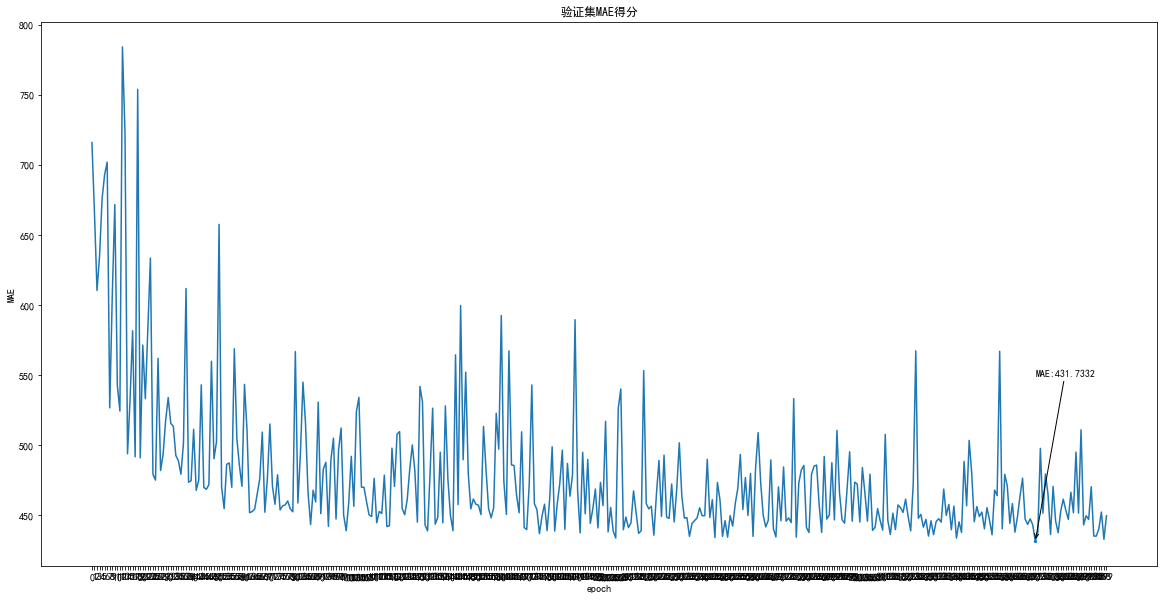

test_x.shape:|(50000, 1792)|
predict.shape:|(50000,)|
i_fold:|1|
train:|torch.Size([112499, 1790])|, train_y:|torch.Size([112499])|,valid_x:|torch.Size([37500, 1790])|,valid_y:|torch.Size([37500])|,test_x:|torch.Size([50000, 1790])|
================================epoch:|0|=========================
test MAE:|766.05517578125|
min mae:|766.05517578125|
================================epoch:|1|=========================
test MAE:|644.4033203125|
min mae:|644.4033203125|
================================epoch:|2|=========================
test MAE:|644.165771484375|
min mae:|644.165771484375|
================================epoch:|3|=========================
test MAE:|582.017578125|
min mae:|582.017578125|
================================epoch:|4|=========================
test MAE:|532.387939453125|
min mae:|532.387939453125|
================================epoch:|5|=========================
test MAE:|534.7926635742188|
================================epoch:|6|=========================
test M

test MAE:|488.0382385253906|
================================epoch:|78|=========================
test MAE:|520.2080688476562|
================================epoch:|79|=========================
test MAE:|501.96148681640625|
================================epoch:|80|=========================
test MAE:|508.4896545410156|
================================epoch:|81|=========================
test MAE:|490.6328125|
================================epoch:|82|=========================
test MAE:|520.4168701171875|
================================epoch:|83|=========================
test MAE:|442.40496826171875|
================================epoch:|84|=========================
test MAE:|490.8939208984375|
================================epoch:|85|=========================
test MAE:|480.32763671875|
================================epoch:|86|=========================
test MAE:|440.8647155761719|
min mae:|440.8647155761719|
================================epoch:|87|=========================
test MAE

test MAE:|454.941162109375|
================================epoch:|160|=========================
test MAE:|439.56292724609375|
================================epoch:|161|=========================
test MAE:|429.0589294433594|
min mae:|429.0589294433594|
================================epoch:|162|=========================
test MAE:|453.9964904785156|
================================epoch:|163|=========================
test MAE:|454.9187316894531|
================================epoch:|164|=========================
test MAE:|452.126708984375|
================================epoch:|165|=========================
test MAE:|436.2663879394531|
================================epoch:|166|=========================
test MAE:|476.48724365234375|
================================epoch:|167|=========================
test MAE:|440.7437744140625|
================================epoch:|168|=========================
test MAE:|480.3610534667969|
================================epoch:|169|==================

test MAE:|433.08935546875|
================================epoch:|243|=========================
test MAE:|461.63519287109375|
================================epoch:|244|=========================
test MAE:|429.33807373046875|
================================epoch:|245|=========================
test MAE:|431.70867919921875|
================================epoch:|246|=========================
test MAE:|460.74591064453125|
================================epoch:|247|=========================
test MAE:|447.90863037109375|
================================epoch:|248|=========================
test MAE:|427.5937194824219|
================================epoch:|249|=========================
test MAE:|444.0274353027344|
================================epoch:|250|=========================
test MAE:|431.6374816894531|
================================epoch:|251|=========================
test MAE:|433.0516662597656|
================================epoch:|252|=========================
test MAE:|484.786

test MAE:|461.0713195800781|
================================epoch:|327|=========================
test MAE:|441.1206970214844|
================================epoch:|328|=========================
test MAE:|429.5821228027344|
================================epoch:|329|=========================
test MAE:|478.8253479003906|
================================epoch:|330|=========================
test MAE:|446.6678466796875|
================================epoch:|331|=========================
test MAE:|434.0462951660156|
================================epoch:|332|=========================
test MAE:|430.7461242675781|
================================epoch:|333|=========================
test MAE:|440.1064453125|
================================epoch:|334|=========================
test MAE:|432.9427795410156|
================================epoch:|335|=========================
test MAE:|430.11029052734375|
================================epoch:|336|=========================
test MAE:|441.75924682

D:\Anaconda3\envs\dev3\lib\site-packages\ipykernel_launcher.py:162: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


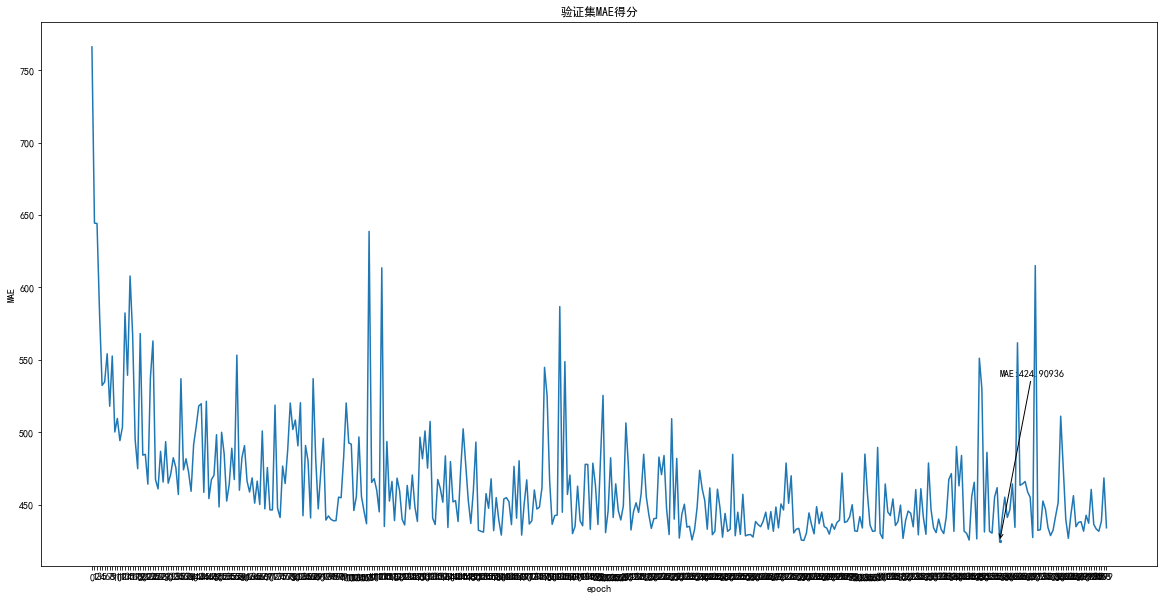

test_x.shape:|(50000, 1792)|
predict.shape:|(50000,)|
i_fold:|2|
train:|torch.Size([112499, 1790])|, train_y:|torch.Size([112499])|,valid_x:|torch.Size([37500, 1790])|,valid_y:|torch.Size([37500])|,test_x:|torch.Size([50000, 1790])|
================================epoch:|0|=========================
test MAE:|874.6587524414062|
min mae:|874.6587524414062|
================================epoch:|1|=========================
test MAE:|660.9613647460938|
min mae:|660.9613647460938|
================================epoch:|2|=========================
test MAE:|700.8178100585938|
================================epoch:|3|=========================
test MAE:|619.7182006835938|
min mae:|619.7182006835938|
================================epoch:|4|=========================
test MAE:|569.611328125|
min mae:|569.611328125|
================================epoch:|5|=========================
test MAE:|550.6759643554688|
min mae:|550.6759643554688|
================================epoch:|6|==================

test MAE:|457.8123779296875|
================================epoch:|78|=========================
test MAE:|491.1600646972656|
================================epoch:|79|=========================
test MAE:|462.5169677734375|
================================epoch:|80|=========================
test MAE:|448.82537841796875|
================================epoch:|81|=========================
test MAE:|491.1290588378906|
================================epoch:|82|=========================
test MAE:|448.4316711425781|
================================epoch:|83|=========================
test MAE:|512.4779052734375|
================================epoch:|84|=========================
test MAE:|461.1672668457031|
================================epoch:|85|=========================
test MAE:|536.8453979492188|
================================epoch:|86|=========================
test MAE:|451.81402587890625|
================================epoch:|87|=========================
test MAE:|443.77825927734375

test MAE:|469.8709411621094|
================================epoch:|161|=========================
test MAE:|441.11346435546875|
================================epoch:|162|=========================
test MAE:|442.56878662109375|
================================epoch:|163|=========================
test MAE:|480.30694580078125|
================================epoch:|164|=========================
test MAE:|492.4257507324219|
================================epoch:|165|=========================
test MAE:|459.0064392089844|
================================epoch:|166|=========================
test MAE:|460.6993103027344|
================================epoch:|167|=========================
test MAE:|497.932861328125|
================================epoch:|168|=========================
test MAE:|457.8472595214844|
================================epoch:|169|=========================
test MAE:|434.9886169433594|
min mae:|434.9886169433594|
================================epoch:|170|================

test MAE:|449.5128479003906|
================================epoch:|244|=========================
test MAE:|443.0751953125|
================================epoch:|245|=========================
test MAE:|462.8656921386719|
================================epoch:|246|=========================
test MAE:|436.7470397949219|
================================epoch:|247|=========================
test MAE:|494.1904602050781|
================================epoch:|248|=========================
test MAE:|477.1178283691406|
================================epoch:|249|=========================
test MAE:|447.5450744628906|
================================epoch:|250|=========================
test MAE:|478.4400939941406|
================================epoch:|251|=========================
test MAE:|429.0884094238281|
min mae:|429.0884094238281|
================================epoch:|252|=========================
test MAE:|434.2666931152344|
================================epoch:|253|=====================

test MAE:|444.7705993652344|
================================epoch:|327|=========================
test MAE:|435.3533935546875|
================================epoch:|328|=========================
test MAE:|429.9053649902344|
================================epoch:|329|=========================
test MAE:|429.65435791015625|
================================epoch:|330|=========================
test MAE:|441.1408386230469|
================================epoch:|331|=========================
test MAE:|529.7041625976562|
================================epoch:|332|=========================
test MAE:|485.90032958984375|
================================epoch:|333|=========================
test MAE:|442.76153564453125|
================================epoch:|334|=========================
test MAE:|429.21478271484375|
================================epoch:|335|=========================
test MAE:|450.5573425292969|
================================epoch:|336|=========================
test MAE:|437.97

D:\Anaconda3\envs\dev3\lib\site-packages\ipykernel_launcher.py:162: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


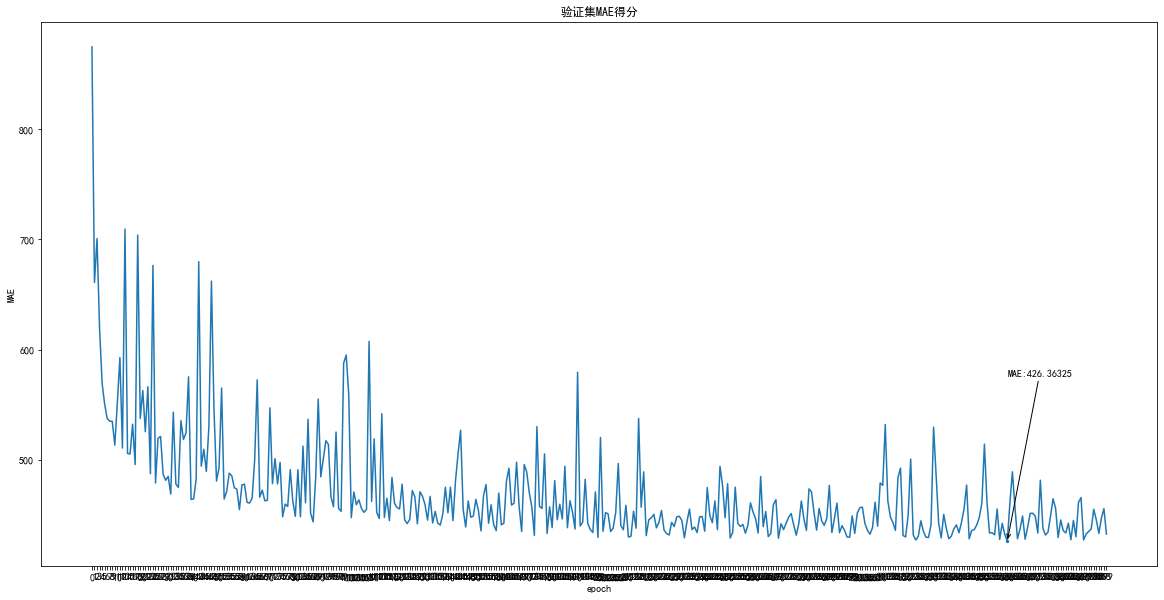

test_x.shape:|(50000, 1792)|
predict.shape:|(50000,)|
i_fold:|3|
train:|torch.Size([112500, 1790])|, train_y:|torch.Size([112500])|,valid_x:|torch.Size([37499, 1790])|,valid_y:|torch.Size([37499])|,test_x:|torch.Size([50000, 1790])|
================================epoch:|0|=========================
test MAE:|680.8340454101562|
min mae:|680.8340454101562|
================================epoch:|1|=========================
test MAE:|606.1019897460938|
min mae:|606.1019897460938|
================================epoch:|2|=========================
test MAE:|635.0379638671875|
================================epoch:|3|=========================
test MAE:|544.668701171875|
min mae:|544.668701171875|
================================epoch:|4|=========================
test MAE:|544.3591918945312|
min mae:|544.3591918945312|
================================epoch:|5|=========================
test MAE:|574.0859375|
================================epoch:|6|=========================
test MAE:|557.598999

test MAE:|577.6679077148438|
================================epoch:|79|=========================
test MAE:|450.1158447265625|
================================epoch:|80|=========================
test MAE:|439.35076904296875|
================================epoch:|81|=========================
test MAE:|449.6600341796875|
================================epoch:|82|=========================
test MAE:|439.7843017578125|
================================epoch:|83|=========================
test MAE:|586.4342041015625|
================================epoch:|84|=========================
test MAE:|464.2693786621094|
================================epoch:|85|=========================
test MAE:|434.07135009765625|
min mae:|434.07135009765625|
================================epoch:|86|=========================
test MAE:|492.67547607421875|
================================epoch:|87|=========================
test MAE:|460.981201171875|
================================epoch:|88|=========================

test MAE:|476.7913818359375|
================================epoch:|162|=========================
test MAE:|449.5426025390625|
================================epoch:|163|=========================
test MAE:|471.3979187011719|
================================epoch:|164|=========================
test MAE:|458.6753234863281|
================================epoch:|165|=========================
test MAE:|448.3596496582031|
================================epoch:|166|=========================
test MAE:|427.7481384277344|
================================epoch:|167|=========================
test MAE:|426.94488525390625|
================================epoch:|168|=========================
test MAE:|428.10198974609375|
================================epoch:|169|=========================
test MAE:|484.5463562011719|
================================epoch:|170|=========================
test MAE:|439.25341796875|
================================epoch:|171|=========================
test MAE:|437.187774

test MAE:|444.11322021484375|
================================epoch:|244|=========================
test MAE:|451.89764404296875|
================================epoch:|245|=========================
test MAE:|433.5618591308594|
================================epoch:|246|=========================
test MAE:|428.40032958984375|
================================epoch:|247|=========================
test MAE:|462.420166015625|
================================epoch:|248|=========================
test MAE:|428.3988037109375|
================================epoch:|249|=========================
test MAE:|432.5849609375|
================================epoch:|250|=========================
test MAE:|437.2983703613281|
================================epoch:|251|=========================
test MAE:|431.39129638671875|
================================epoch:|252|=========================
test MAE:|465.4624328613281|
================================epoch:|253|=========================
test MAE:|443.621215

test MAE:|426.9533996582031|
================================epoch:|328|=========================
test MAE:|427.5732116699219|
================================epoch:|329|=========================
test MAE:|424.2181396484375|
================================epoch:|330|=========================
test MAE:|442.0309753417969|
================================epoch:|331|=========================
test MAE:|464.1647644042969|
================================epoch:|332|=========================
test MAE:|439.99505615234375|
================================epoch:|333|=========================
test MAE:|479.92095947265625|
================================epoch:|334|=========================
test MAE:|442.9100646972656|
================================epoch:|335|=========================
test MAE:|436.9151306152344|
================================epoch:|336|=========================
test MAE:|444.77130126953125|
================================epoch:|337|=========================
test MAE:|421.971

D:\Anaconda3\envs\dev3\lib\site-packages\ipykernel_launcher.py:162: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


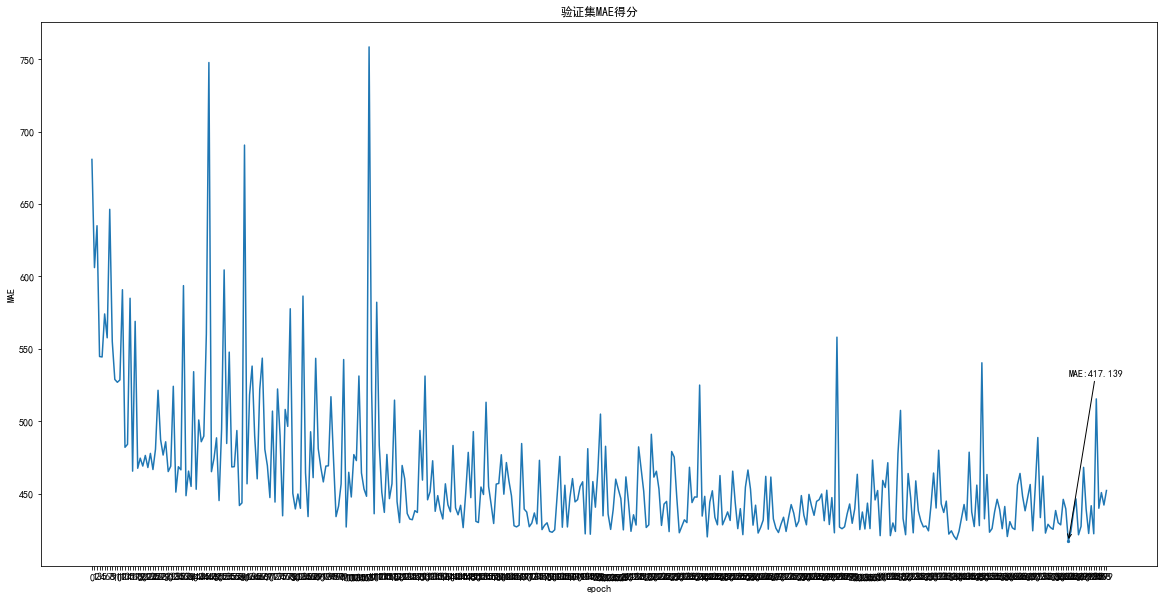

test_x.shape:|(50000, 1792)|
predict.shape:|(50000,)|
test_x.shape:|(50000, 1792)|
predict.shape:|(50000,)|


In [10]:
from __future__ import print_function, division
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torchvision import datasets, transforms
from torch.utils import data
from torch.autograd import Variable
import numpy as np
# from torchvision import models
import os
import math
import cv2
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, RepeatedKFold


class Fcn(nn.Module):
    def __init__(self, column_num):
        self.column_num = column_num
        super(Fcn, self).__init__()
        # 这里全连接层的输出个数 ALexNet中的数倍。使用dropout来缓解过拟合。
        self.hidden = nn.Sequential(
            nn.Linear(self.column_num, 256),
#             nn.Dropout(0.4),
            nn.ReLU(),    
#             nn.Linear(512, 256),
# #             nn.Dropout(0.4),
#             nn.ReLU(),    
            nn.Linear(256, 128),
#             nn.Dropout(0.4),
            nn.ReLU(),   
            nn.Linear(128, 56),
#             nn.Dropout(0.4),
            nn.ReLU(),     
            nn.Linear(56, 28),
#             nn.Dropout(0.4),
            nn.ReLU(),           
            nn.Linear(28, 1),
        )
        
    def forward(self, train_x):
        output = self.hidden(train_x)
        return output

class Train(object):
    def __init__(self, df, train_size, learning_rate, epochs, batch_size):
        self.df = df
        self.train_size = train_size
        self.train_x, self.train_y, self.test_x = self.dataset
        self.net = Fcn(self.test_x.shape[1])
        if torch.cuda.is_available():
            print('use gpu!')
            self.net.cuda()
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.result_save_path = 'data/fcn_result.csv'
        self.loss_func = nn.L1Loss()
        self.optimizer = optim.Adam(self.net.parameters(), lr=self.learning_rate)
#         self.train_loss = []
#         self.MAE_BASE = 1000
        self.test_result = np.zeros(len(self.test_x))
        self.i_fold = None
    
    def weight_init(self, m):
        if isinstance(m, nn.Linear):
            if self.i_fold == 0:
                nn.init.normal_(m.weight)
            if self.i_fold ==1:  
                nn.init.xavier_normal_(m.weight)
            else:
                nn.init.kaiming_normal_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
            
    @property
    def dataset(self):      
        train_x = self.df[:self.train_size].drop(['SaleID', 'price'], axis=1).values
        train_y = self.df[:self.train_size]['price'].values
        test_x = self.df[self.train_size:].drop(['SaleID', 'price'], axis=1).values
        scales = MinMaxScaler( feature_range=(0,1))
        train_x = scales.fit_transform(train_x)
        test_x = scales.transform(test_x)
        train_x = torch.from_numpy(train_x.astype(np.float32))
        train_y = torch.from_numpy(train_y.astype(np.float32))
        test_x = torch.from_numpy(test_x.astype(np.float32)).cuda()
        return train_x, train_y, test_x
    
    def dataloader(self, data_x, data_y):
        data_y = torch.unsqueeze(data_y, dim=1)
        dataset = data.TensorDataset(data_x, data_y)
        dataloader = data.DataLoader(dataset=dataset,
                                     batch_size=self.batch_size,
                                     shuffle=True,
                                     num_workers=1)
        return dataloader
    
    def __call__(self, kfold):
        folds = KFold(n_splits=kfold, shuffle=True, random_state=2020)
        for i_fold, (train_index, valid_index) in enumerate(folds.split(self.train_x, self.train_y)):
            self.i_fold = i_fold
            self.net.apply(self.weight_init)
            self.net.train()
            print('i_fold:|{}|'.format(i_fold))
            train_x = self.train_x[train_index]
            train_y = self.train_y[train_index]
            valid_x = self.train_x[valid_index].cuda()
            valid_y = self.train_y[valid_index].cuda()
            print("train:|{}|, train_y:|{}|,valid_x:|{}|,valid_y:|{}|,test_x:|{}|".format(train_x.shape,
                                                                                          train_y.shape,
                                                                                          valid_x.shape,
                                                                                          valid_y.shape,
                                                                                          self.test_x.shape))
            trainloader = self.dataloader(train_x, train_y)
            MAE_list = []
            MAE_BASE = 1000
            for epoch in range(self.epochs):
                print("================================epoch:|{}|=========================".format(epoch))
                for batch_x, batch_y in trainloader:
                    batch_x, batch_y = Variable(batch_x).cuda(), Variable(batch_y).cuda()
                    out = self.net(batch_x)
                    batch_loss = self.loss_func(out, batch_y)
                    self.optimizer.zero_grad()
                    batch_loss.backward()
                    self.optimizer.step()
                MAE = self.valid(valid_x,valid_y)
                MAE_list.append(MAE)
                if MAE < MAE_BASE:
                    print('min mae:|{}|'.format(MAE))
                    MAE_BASE = MAE
                    out_predict = self.predict(data_x=self.test_x)
            self.eda(plot_x=range(self.epochs), plot_y=MAE_list)
            self.test_result += out_predict/kfold
            result_save(result=out_predict, save_path='data/fcn_i_fold%s_result.csv'%i_fold)
        return self.test_result
                
    def valid(self, data_x, data_y):
        self.net.eval()
#         out = self.net.forward(data_x)
        out = self.net(data_x)
        out = np.expm1(out.cpu().detach().numpy())
        label = np.expm1(data_y.cpu().detach().numpy())
        MAE = mean_absolute_error(label, out)
        print("test MAE:|{}|".format(MAE))
        return MAE
    
    def predict(self, data_x):
        self.net.eval()
        out = self.net(data_x)
        out = np.expm1(np.squeeze(out.cpu().detach().numpy().reshape(-1,1)))
        return out
    
    def eda(self, plot_x, plot_y):
        fig = plt.figure(figsize=(20,10))
        plt.title('验证集MAE得分')
        plt.xlabel('epoch')
        plt.xticks(plot_x)
        plt.ylabel('MAE')
        ax = fig.add_subplot(111)
        ax.plot(plot_x, plot_y)
        min_mae = min(plot_y)
        min_mae_epoch = plot_x[plot_y.index(min(plot_y))]
        ax.scatter(min_mae_epoch, min_mae, s=5,)
        ax.annotate("MAE:"+str(min_mae), 
                   xy=(min_mae_epoch, min_mae),
                   xycoords='data',
                   xytext=(min_mae_epoch, min_mae + ((max(plot_y) - min(plot_y)) / 3)),
                   arrowprops=dict(arrowstyle='->',
                                  connectionstyle='arc3'))
        plt.show()

def result_save(result,
               save_path='data/fcn_result.csv'):   
    df_result = pd.DataFrame()
    print("test_x.shape:|{}|".format(df_test.shape ))
    print("predict.shape:|{}|".format(result.shape ))
    df_result['SaleID'] = df_test['SaleID']
    df_result['price'] = result
    df_result.to_csv(save_path, index=False)
        
df_train = df_copy[:train_size]
df_test = df_copy[train_size:]

train = Train(df=df_copy,
              train_size=train_size,
              learning_rate=0.0001,
              epochs=400,
              batch_size=128,)
print("train init finish!")
result = train(kfold=4)
result_save(result=result)